#Projet de ML : Prédiction d'émotions associées à des tweets.

**Plan** :

*   Introduction

Notre problématique
Présentation du jeu de données
Réflexion : comment associer notre problématique à un problème de ML

* Partie 1 : Prétraitement des données : sélection du nombre de lignes

* Partie 2 : Prétraitement BOW et modèle NLP

* Partie 3 : Prétaitement Word Embedding et modèle NLP

* Partie 4 : Prétraitement CountVectorizer et Random Forest

* Partie 5 : Prétraitement CountVectorizer et Decision Tree

* Partie 6 : Prétraitement Tfidf (avec ou sans stop words) et NLP

* Partie 7 : Comparaison et choix du modèle

* Conclusion





**Intro** :

Dans ce notebook, nous vous présentons notre démarche pour répondre à la problématique suivante :

*   Comment déterminer les émotions associées à un grand ensemble de phrases sous la forme de tweets ?

Nous avons extrait un jeu de données "Emotions" du site Kaggle. Ce jeu de données contient plus de 400 000 lignes et 2 colonnes. Chaque ligne correspond à un tweet différent. La première colonne reprend le tweet (en anglais) sous forme de chaîne de caractère. La deuxième colonne renvoie un nombre entre 0 et 5 qui correspond à l'émotion associé.

Voici la liste des émotions et le chiffre associé : Tristesse (0), Joie (1), Amour (2), Colère (3), Peur (4) et Surprise (5).

Voici un extrait du jeu de données (5 premières lignes) pour avoir une idée de la structure :


text,label
i just feel really helpless and heavy hearted,4

i dont know i feel so lost,0

i would think that whomever would be lucky enough to stay in this suite must feel like it is the most romantic place on earth,2

i fear that they won t ever feel that delicious excitement of christmas eve at least not in the same way i remember doing it,1


Pour répondre à cette problématique et aux attentes du projet, nous avons développé une approche de type apprentissage supervisé. Ici, nous avons un problème de type classification linéaire multiclasses. Il faut donc choisir des modèles de ce type pour répondre à notre problématique (on exclue les modèles de type régression linéaire).

Ci-dessous, l'importation des bibliothèques pour notre projet.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from IPython.display import display

In [ ]:
df=pd.read_csv('text.csv')

#Partie 1 : Prétraitement des données : sélection du nombre de lignes


* Sélection du nombre de lignes

Nous avons été contraints de sélectionner un nombre de lignes limité. Lors de la transformation de la colonne texte avec les différentes méthodes de vectorisation, nous augmentons considérablement la taille de notre dataframe. Le volume de données à traiter est proportionnel à la mémoire RAM nécessaire pour faire tourner le programme. Alors pour que notre programme soit performant tout en limitant la RAM utilisée nous avons décidé de limiter notre jeu de données à 30 000 lignes.

In [ ]:
df1=df.copy().head(30000)  # dataset que l'on va utiliser pour le BOW
df2=df.copy().head(30000)  # dataset que l'on va utiliser pour le Word embedding
df3=df.copy().head(10000)  # dataset que l'on va utiliser pour le RandomForest et DecisionTree
df4=df.copy().head(10000)  # dataset que l'on va utiliser pour le TF-IDF
df5=df.copy() # dataset que l'on va utiliser pour l'équilibrage des données

* Equilibrage des données ou données brut

La cellule ci-dessous créée un DataFrame df6 dans lequel nous avons autant de 0 (Tristesse) que de 1 (Joie) que de 2 (Amour)... L'objectif est d'entraîner autant les données pour chaque émotion. Nous nous sommes rendus compte qu'il y avait beaucoup moins de tweets donc l'émotion associé est la surprise. Dans la suite de notre projet, nous avons la possibilité d'utiliser df6 ou non pour l'équilibrage des données.

In [ ]:
data0=df5.loc[df5['label']==0].head(5000)
data1=df5.loc[df5['label']==1].head(5000)
data2=df5.loc[df5['label']==2].head(5000)
data3=df5.loc[df5['label']==3].head(5000)
data4=df5.loc[df5['label']==4].head(5000)
data5=df5.loc[df5['label']==5].head(5000)
df6=pd.concat([data0,data1,data2,data3,data4,data5], axis=0)
df6

,Unnamed: 0,text,label
1,1,ive enjoyed being able to slouch about relax a...,0.0
3,3,i dont know i feel so lost,0.0
5,5,i was beginning to feel quite disheartened,0.0
9,9,i can still lose the weight without feeling de...,0.0
11,11,im feeling a little like a damaged tree and th...,0.0
...,...,...,...
19475,19475,i really dislike talking about my feelings unl...,5.0
19499,19499,i have learnt to stop and question my thinking...,5.0
19538,19538,i feel like the chance card below was funny an...,5.0
19539,19539,i wasn t feeling so impressed with myself,5.0


#Partie 2 : Prétraitement BOW et modèle NLP

* Choix du vectorizer

Premier vectorizer : le Bag of Words (BOW). Le principe est le suivant : la machine va lire chaque phrase et placer tous les mots dans un sac (d'où sac de mots). Les mots uniques forment nos caractéristiques (nos nouvelles colonnes), Ensuite on transforme les tweets initiaux en vecteur. On associe l'occurence de chaque mot de notre vecteur en fonction des caractéristiques. (Par exemple "le chat poursuit le chien" pourrait être un vecteur [2,1,1,1,0] où nos caractéristiques seraient ("le", "chat", "poursuit", "chien", "maison")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_BOW = CountVectorizer(lowercase=False, tokenizer=lambda x: x, preprocessor=lambda x: x)

df1['text'] = df1['text'].str.split(' ',)

X_BOW = vectorizer_BOW.fit_transform(df1['text'])

df_encoded_BOW = pd.DataFrame(X_BOW.toarray(), columns=vectorizer_BOW.get_feature_names_out())

df_concatenated_BOW  = pd.concat([df_encoded_BOW, df1['label']], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
import numpy as np
import tensorflow as tf
tf.__version__
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


X_test_BOW = df_concatenated_BOW.head(24000).iloc[:, :-1].values
y_test_BOW = df_concatenated_BOW.head(24000).iloc[:, -1].values
X_train_BOW = df_concatenated_BOW[24000:].iloc[:, :-1].values
y_train_BOW = df_concatenated_BOW[24000:].iloc[:, -1].values


valid_indices1 = (y_train_BOW >= 0) & (y_train_BOW < 6)
y_train_BOW_filtered = y_train_BOW[valid_indices1]
y_train_BOW_one_hot = to_categorical(y_train_BOW_filtered, num_classes=6)

valid_indices2 = (y_test_BOW >= 0) & (y_test_BOW < 6)
y_test_BOW_filtered = y_test_BOW[valid_indices2]
y_test_BOW_one_hot = to_categorical(y_test_BOW_filtered, num_classes =6)

X_train_BOW_filtered=X_train_BOW[valid_indices1]
X_test_BOW_filtered=X_test_BOW[valid_indices2]

Après avoir réalisé le pré-traitement des données et divisé notre jeu de données en données d'entraînement et de test, nous allons appliquer un modèle de type ANN (réseaux de neurones) avec 2 premières couches de 128 et 64 neurones et notre dernière couche applicative. Nos hyperparamètres sont fixés à 3 epochs (chaque entrée est vue 3 fois en tout dans le modèle) et 32 batch size (lors de chaque itération du modèle, le réseaux de données verra 32 entrées à la fois, soit 24 000/32 = 750 itérations/epoch).

In [ ]:
model_BOW = Sequential([
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

model_BOW.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_BOW.fit(X_train_BOW_filtered, y_train_BOW_one_hot, epochs=3, batch_size=32)


ValueError: Expected input data to be non-empty.

Ci-dessous, nous évaluons la précision du modèle. La précision sera utilisée pour comparer nos modèles et evaluer le plus performant à hyperparamètres égaux.


Nous codons également la fonction qui transforme n'importe quel texte (tweet) en vecteur avec la technique bag of words. L'idée est de tester pour n'importe quelle phrase. Nous souhaitions tester à la main notre modèle sur des exemples de notre jeu de données que nous n'avions pas utiliser pour l'entraînement.

In [ ]:
test_loss_BOW, test_acc_BOW = model_BOW.evaluate(X_test_BOW_filtered, y_test_BOW_one_hot, batch_size=32)

print(f'Test accuracy: {test_acc_BOW}')

def transf_BOW(texte,vectorizer):
    texte_preprocessed = [texte]  # Appliquez votre logique de tokenisation/prétraitement si nécessaire
    texte_vect = vectorizer.transform(texte_preprocessed)
    return texte_vect.toarray()

750/750 [==============================] - 3s 4ms/step - loss: 0.5073 - accuracy: 0.8417
Test accuracy: 0.8416666388511658


In [ ]:
prediction_BOW  = model_BOW.predict(transf_BOW('i feel like being mentally tortured',vectorizer_BOW))
print(prediction_BOW)
classe_predite_BOW = np.argmax(prediction_BOW , axis=1)
print(classe_predite_BOW)

1/1 [==============================] - 0s 66ms/step
[[2.9968101e-01 3.9132207e-04 2.4681360e-05 6.9980264e-01 8.3711238e-05
  1.6709388e-05]]
[3]


# Partie 3 : Word embedding et modèle NLP

Le prétraitement que nous allons voir ici est le word embedding. Le principe du word embedding est de capturer les relations sémantiques entre une suite de mot. Chaque caractéristique reprend une relation sémantique. On vectorise chaque tweet en associant un nombre : par exemple entre 0 et 1 pour chaque caractéristique avec 1 la similarité parfaite. On applique ensuite un modèle de régression logistique multiclasse de type one vs all (modèle par défaut dans la bibliothèque sklearn).

Word embedding (df2)

In [ ]:
X_emb = df2.text
X_split_emb= X_emb.str.split(' ',)
X_list_emb = X_split_emb.tolist()

X_train_emb= X_list_emb[:24000]
X_test_emb = X_list_emb[24001:]

y_train_emb= df2[:24000].iloc[:, -1].values
y_test_emb=df2[24001:].iloc[:, -1].values

In [ ]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

model = Word2Vec(X_train_emb, vector_size=100, window=5, min_count=1, workers=4)


X_vec_train_emb = np.array([np.mean([model.wv[word] for word in sentence if word in model.wv], axis=0) for sentence in X_train_emb])
X_vec_test_emb = np.array([np.mean([model.wv[word] for word in sentence if word in model.wv], axis=0) for sentence in X_test_emb])


classifier_emb = LogisticRegression()
classifier_emb.fit(X_vec_train_emb , y_train_emb)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Ici, comme pour le modèle précédent, on détermine la précision et également la perte.

In [ ]:
y_pred_proba_emb = classifier_emb.predict_proba(X_vec_test_emb)
test_acc = classifier_emb.score(X_vec_test_emb, y_test_emb)
print(f'Test accuracy: {test_acc}')

test_loss = log_loss(y_test_emb, y_pred_proba_emb)
print(f'Test loss: {test_loss}')


Test accuracy: 0.3878979829971662
Test loss: 1.5246668942298063


In [ ]:
new_doc = "i feel like i have been neglecting you my faithful reader s".split()  # Tokenisation simple
new_doc_vector = np.mean([model.wv[word] for word in new_doc if word in model.wv], axis=0).reshape(1, -1)

prediction_emb = classifier_emb.predict(new_doc_vector)
print(prediction_emb)

[0]


# Partie 4 : Prétraitement CountVectorizer et Random Forest


Le modèle que nous allons évaluer maintenant est random forest qui fonctionne en construisant un ensemble d'arbres de décision pendant la phase d'entraînement. Chaque arbre est formé sur un sous-ensemble aléatoire des données d'entraînement et utilise un sous-ensemble aléatoire des caractéristiques pour prendre des décisions. Lors de la prédiction, chaque arbre donne sa propre prédiction, et la prédiction finale est obtenue par un vote majoritaire (pour la classification) ou une moyenne (pour la régression) des prédictions individuelles des arbres.

RandomForest (df3)

In [ ]:
valeursX=['text']
valeursy=['label']
y_train_RF=df3[:8000].iloc[:,-1]
X_train_RF=df3[:8000].iloc[:,:-1]
X_test_RF=df3[8001:].iloc[:,:-1]
y_test_RF=df3[8001:].iloc[:,-1]

In [ ]:
X_train_split_RF = X_train_RF['text'].str.split(' ')
X_test_split_RF= X_test_RF['text'].str.split(' ')
X_train_split_RF

0       [i, just, feel, really, helpless, and, heavy, ...
1       [ive, enjoyed, being, able, to, slouch, about,...
2       [i, gave, up, my, internship, with, the, dmrg,...
3                      [i, dont, know, i, feel, so, lost]
4       [i, am, a, kindergarten, teacher, and, i, am, ...
                              ...                        
7995    [i, did, feel, very, elegant, suddenly, portma...
7996                  [i, was, already, feeling, nervous]
7997    [i, walk, around, dressed, plainly, im, talkin...
7998    [i, used, the, little, evian, water, spray, wh...
7999    [i, had, taken, piriton, which, just, makes, m...
Name: text, Length: 8000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_RF = CountVectorizer(lowercase=False, tokenizer=lambda x: x, preprocessor=lambda x: x)

X_train_encoded_RF = vectorizer_RF.fit_transform(X_train_split_RF)
X_test_encoded_RF = vectorizer_RF.transform(X_test_split_RF)

df_train_encoded_RF = pd.DataFrame(X_train_encoded_RF.toarray(), columns=vectorizer_RF.get_feature_names_out())
df_test_encoded_RF = pd.DataFrame(X_test_encoded_RF.toarray(), columns=vectorizer_RF.get_feature_names_out())


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators=100,random_state=42)

model_RF.fit(df_train_encoded_RF, y_train_RF)

RandomForestClassifier(random_state=42)

In [ ]:
predictions_RF = model_RF.predict(df_test_encoded_RF)
print(predictions_RF)

[0 1 0 ... 0 0 1]


Ici, en plus de la précision, on évalue le modèle avec l'erreur moyenne quadratique, et le score R^2

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

mse_RF = mean_squared_error(y_test_RF, predictions_RF)
print("Mean Squared Error:", mse_RF)

accuracy_RF = accuracy_score(y_test_RF, predictions_RF)
print(f"Accuracy: {accuracy_RF}")

r2_RF = r2_score(y_test_RF, predictions_RF)
print("R² score:", r2_RF)

Mean Squared Error: 0.7113556778389195
Accuracy: 0.848424212106053
R² score: 0.6735521444365509


# Partie 5 : Prétraitement CountVectorizer et Decision Tree


Lorsque nous utilisons un modèle d'Arbre de Décision pour prédire l'émotion d'un tweet, nous commençons par prétraiter le tweet pour le rendre compatible avec le modèle. Ensuite, le tweet est transformé en une représentation numérique qui est ensuite introduite dans l'arbre de décision. À chaque étape de l'arbre, une caractéristique spécifique du tweet est évaluée, guidant le flux de données à travers les branches de l'arbre jusqu'à ce qu'une décision soit prise. Cette décision finale détermine l'émotion prédite pour le tweet.

DecisionTree (df4)

In [ ]:
valeursX=['text']
valeursy=['label']
y_train_DT=df4[:8000].iloc[:,-1]
X_train_DT=df4[:8000].iloc[:,:-1]
X_test_DT=df4[8001:].iloc[:,:-1]
y_test_DT=df4[8001:].iloc[:,-1]

In [ ]:
X_train_split_DT = X_train_DT['text'].str.split(' ')
X_test_split_DT= X_test_DT['text'].str.split(' ')
X_train_split_DT

0       [i, just, feel, really, helpless, and, heavy, ...
1       [ive, enjoyed, being, able, to, slouch, about,...
2       [i, gave, up, my, internship, with, the, dmrg,...
3                      [i, dont, know, i, feel, so, lost]
4       [i, am, a, kindergarten, teacher, and, i, am, ...
                              ...                        
7995    [i, did, feel, very, elegant, suddenly, portma...
7996                  [i, was, already, feeling, nervous]
7997    [i, walk, around, dressed, plainly, im, talkin...
7998    [i, used, the, little, evian, water, spray, wh...
7999    [i, had, taken, piriton, which, just, makes, m...
Name: text, Length: 8000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_DT = CountVectorizer(lowercase=False, tokenizer=lambda x: x, preprocessor=lambda x: x)

X_train_encoded_DT = vectorizer_DT.fit_transform(X_train_split_DT)
X_test_encoded_DT = vectorizer_DT.transform(X_test_split_DT)

df_train_encoded_DT = pd.DataFrame(X_train_encoded_DT.toarray(), columns=vectorizer_DT.get_feature_names_out())
df_test_encoded_DT = pd.DataFrame(X_test_encoded_DT.toarray(), columns=vectorizer_DT.get_feature_names_out())

print(df_train_encoded_DT)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


      a  aaron  aatp  aback  abandon  abandoned  abandoning  abandonment  \
0     0      0     0      0        0          0           0            0   
1     2      0     0      0        0          0           0            0   
2     0      0     0      0        0          0           0            0   
3     0      0     0      0        0          0           0            0   
4     1      0     0      0        0          0           0            0   
...  ..    ...   ...    ...      ...        ...         ...          ...   
7995  0      0     0      0        0          0           0            0   
7996  0      0     0      0        0          0           0            0   
7997  0      0     0      0        0          0           0            0   
7998  0      0     0      0        0          0           0            0   
7999  1      0     0      0        0          0           0            0   

      abdominal  abe  ...  zingers  ziva  zombie  zone  zoom  zooming  zouk  \
0       

In [ ]:
from sklearn.tree import DecisionTreeRegressor

iowa_model = DecisionTreeRegressor(random_state=1)

iowa_model.fit(df_train_encoded_DT, y_train_DT)

DecisionTreeRegressor(random_state=1)

In [ ]:
prediction_DT = iowa_model.predict(df_test_encoded_DT)
print(prediction_DT)

[0. 1. 0. ... 0. 0. 1.]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse_DT = mean_squared_error(y_test_DT, prediction_DT)
print("Mean Squared Error:", mse_DT)

r2_DT = r2_score(y_test_DT, prediction_DT)
print("R² score:", r2_DT)

Mean Squared Error: 0.7453726863431716
R² score: 0.6579414171662874


# Partie 6 : Prétraitement Tfidf (avec ou sans stop words) et NLP

TF-IDF (df4)


In [ ]:
X=df5.text.head(30000)
X.shape

(19679,)

Sans supprimer les stop-words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_TF = TfidfVectorizer()

X_vec = vectorizer_TF.fit_transform(X)
X_vec.shape

(19679, 16937)

Avec suppression des stop-words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_TF = TfidfVectorizer(stop_words='english')

X_vec = vectorizer_TF.fit_transform(X)
X_vec

<30000x20829 sparse matrix of type '<class 'numpy.float64'>'
	with 244670 stored elements in Compressed Sparse Row format>

Suite dans les 2 cas

In [ ]:
import pandas as pd
df_vec_TF = pd.DataFrame(X_vec.toarray(), columns=vectorizer_TF.get_feature_names_out())
print(df_vec_TF.shape)

(19679, 16937)


In [ ]:
import numpy as np
import tensorflow as tf
tf.__version__
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

X_train_TF = df_vec_TF[:24000].iloc[:, :].values
y_train_TF = df5[:24000].iloc[:, -1].values

X_test_TF = df_vec_TF[24001:30000].iloc[:, :].values
y_test_TF = df5[24001:30000].iloc[:, -1].values

y_train_one_hot_TF = to_categorical(y_train_TF, num_classes=6)
y_test_one_hot_TF = to_categorical(y_test_TF, num_classes=6)

/usr/local/lib/python3.10/dist-packages/keras/src/utils/np_utils.py:62: RuntimeWarning: invalid value encountered in cast
  y = np.array(y, dtype="int")


IndexError: index -9223372036854775808 is out of bounds for axis 1 with size 6

In [ ]:
model_TF = Sequential([
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

model_TF.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_TF.fit(X_train_TF, y_train_one_hot_TF, epochs=5, batch_size=32)


Epoch 1/5
750/750 [==============================] - 10s 12ms/step - loss: 0.6901 - accuracy: 0.7544
Epoch 2/5
750/750 [==============================] - 9s 12ms/step - loss: 0.1474 - accuracy: 0.9467
Epoch 3/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0731 - accuracy: 0.9746
Epoch 4/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0498 - accuracy: 0.9831
Epoch 5/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0377 - accuracy: 0.9862


In [ ]:
test_loss_TF, test_acc_TF = model_TF.evaluate(X_test_TF , y_test_one_hot_TF, batch_size=32)

print(f'Test accuracy: {test_acc_TF}')

188/188 [==============================] - 1s 4ms/step - loss: 0.4610 - accuracy: 0.8618
Test accuracy: 0.8618103265762329


In [ ]:
def transf_TF(text, vectorizer):
    texte_vect = vectorizer_TF.transform([text])
    return texte_vect.toarray()

In [ ]:
prediction_TF = model_TF.predict(transf_TF('i feel frightened like something is ending',vectorizer_TF))
print(prediction_TF)
classe_predite_TF = np.argmax(prediction_TF, axis=1)
print(classe_predite_TF)

1/1 [==============================] - 0s 90ms/step
[[1.8396782e-05 6.3663089e-07 8.3542211e-08 8.0155297e-07 9.9990535e-01
  7.4711745e-05]]
[4]


Anti over-fitting (à mettre après le modele compil à la place de modele fit)

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # La métrique à surveiller
    patience=3,          # Nombre d'époques sans amélioration après lesquelles l'entraînement sera stoppé
    restore_best_weights=True
)

history = model_TF.fit(
    X_train_TF, y_train_one_hot_TF,
    validation_data=(X_test_TF, y_test_one_hot_TF),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]  # Utilisation de la fonction de callback EarlyStopping
)

Epoch 1/100
750/750 [==============================] - 11s 14ms/step - loss: 0.0303 - accuracy: 0.9885 - val_loss: 0.5179 - val_accuracy: 0.8533
Epoch 2/100
750/750 [==============================] - 10s 13ms/step - loss: 0.0274 - accuracy: 0.9893 - val_loss: 0.5398 - val_accuracy: 0.8540
Epoch 3/100
750/750 [==============================] - 10s 13ms/step - loss: 0.0235 - accuracy: 0.9901 - val_loss: 0.6107 - val_accuracy: 0.8493
Epoch 4/100
750/750 [==============================] - 10s 13ms/step - loss: 0.0224 - accuracy: 0.9903 - val_loss: 0.6112 - val_accuracy: 0.8488


In [ ]:
test_loss_TF, test_acc_TF = model_TF.evaluate(X_test_TF , y_test_one_hot_TF, batch_size=32)

print(f'Test accuracy: {test_acc_TF}')

188/188 [==============================] - 1s 4ms/step - loss: 0.5179 - accuracy: 0.8533
Test accuracy: 0.8533088564872742




PARTIE 7 : COMPARAISON ET CHOIX DU MODELE

La diversité de nos modèles et leurs différences de formats de données d'entrée fait qu'ils ne sont pas directement tous comparables par des caractéristiques communes ( modèles de classification / modèles de régression ).







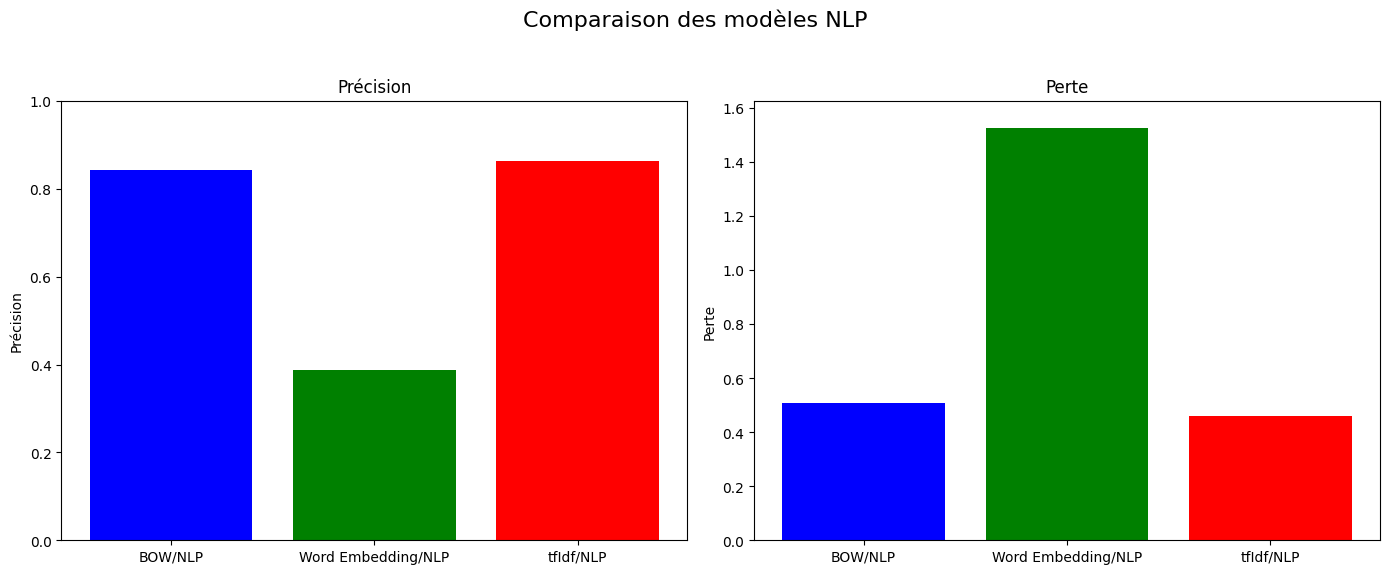

In [ ]:
# @title Comparaison des modèles de classification
# Création du tableau de comparaison avec un titre commun
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Ajout d'un titre commun
fig.suptitle('Comparaison des modèles NLP', fontsize=16)

# Graphique pour la précision
ax[0].bar(model_names, accuracies, color=['blue', 'green', 'red'])
ax[0].set_title('Précision')
ax[0].set_ylabel('Précision')
ax[0].set_ylim(0, 1)

# Graphique pour la perte
ax[1].bar(model_names, losses, color=['blue', 'green', 'red'])
ax[1].set_title('Perte')
ax[1].set_ylabel('Perte')
ax[1].set_ylim(0, max(losses) + 0.1)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuste l'espace pour le titre principal
plt.show()


Ces résultats suggèrent que, pour cette tâche spécifique de classification de textes, les techniques de prétraitement tfIdf et BOW sont préférables à l'approche Word Embedding, du moins dans le contexte des architectures de modèles testées. Le succès de **tfIdf** pourrait être attribué à sa capacité à souligner l'importance relative des mots dans le contexte de l'ensemble du jeu de données, offrant ainsi une meilleure distinction entre les catégories.


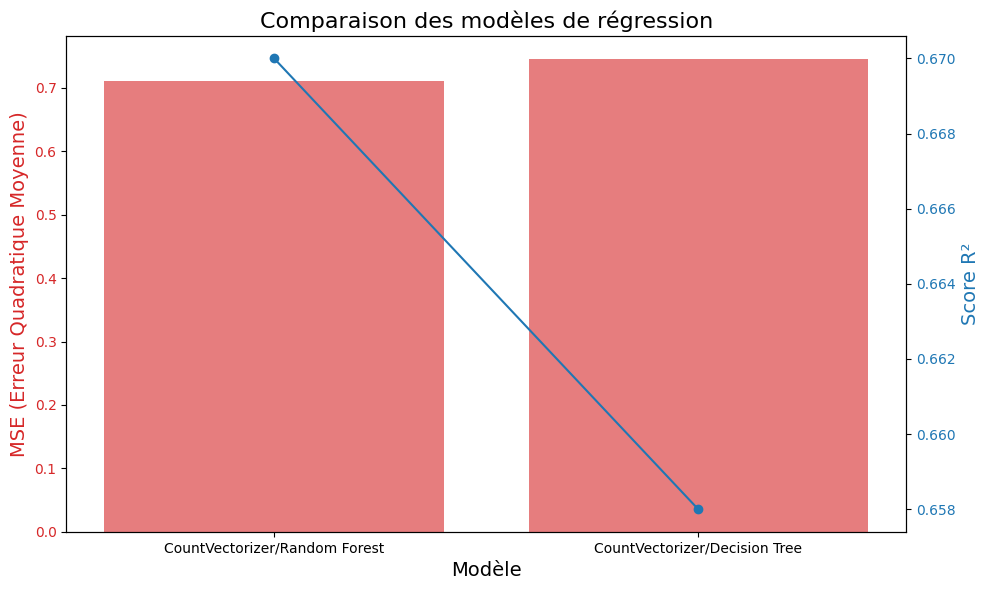

In [ ]:

# Données des modèles de régression
model_names_regression = ['CountVectorizer/Random Forest', 'CountVectorizer/Decision Tree']
mse_values = [0.711, 0.745]  # Erreur quadratique moyenne pour chaque modèle
r2_values = [0.67, 0.658]  # Score R² pour chaque modèle

# Création du graphique de comparaison pour les modèles de régression
fig, ax1 = plt.subplots(figsize=(10, 6))

# Configuration du premier axe pour MSE
ax1.set_title('Comparaison des modèles de régression', fontsize=16)
ax1.set_xlabel('Modèle', fontsize=14)
ax1.set_ylabel('MSE (Erreur Quadratique Moyenne)', fontsize=14, color='tab:red')
ax1.bar(model_names_regression, mse_values, color='tab:red', alpha=0.6, label='MSE')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Ajout d'un second axe pour le score R²
ax2 = ax1.twinx()
ax2.set_ylabel('Score R²', fontsize=14, color='tab:blue')
ax2.plot(model_names_regression, r2_values, color='tab:blue', marker='o', label='Score R²')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.show()


Erreur Quadratique Moyenne (MSE) : Le modèle Random Forest a enregistré un MSE légèrement inférieur (0.711) par rapport à l'arbre de décision (0.745), indiquant qu'en moyenne, les prédictions du modèle Random Forest sont plus proches des valeurs réelles.

Score R² : Le score R² du modèle Random Forest est de 0.67, tandis que celui de l'arbre de décision est de 0.658. Bien que les deux modèles affichent des performances relativement similaires en termes de R², le modèle Random Forest a légèrement mieux performé, ce qui suggère qu'il explique une plus grande proportion de la variance dans les données par rapport à l'arbre de décision.

Ces résultats montrent que, pour des tâches de régression sur des données textuelles prétraitées avec CountVectorizer, le modèle Random Forest tend à offrir de meilleures performances que l'arbre de décision, bien que la différence ne soit pas énorme. La supériorité relative du Random Forest peut être attribuée à sa capacité à construire un modèle plus généralisé en combinant les prédictions de nombreux arbres de décision, réduisant ainsi le risque de surajustement associé aux arbres de décision individuels.

CONCLUSION



En conclusion , dans notre cas le modèle NLP avec un pré-traitement TfIdf est le meilleur dans la catégorie classification et le Random Forest pour la regression linéaire. Aussi dans notre cas, le modèle NLP est celui qui nous permet d'obtenir les meilleurs résultats malgré que le Random Forest soit plus rapide en entrainement.